<a href="https://colab.research.google.com/github/fiftybucks101/Decision_Tree/blob/main/descision_tree_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df['species'].replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)

In [ ]:
# first we observe with two independent feature sepal_length and sepal_width

X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X.shape

(150, 2)

In [ ]:
y.shape

(150,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.tree import plot_tree

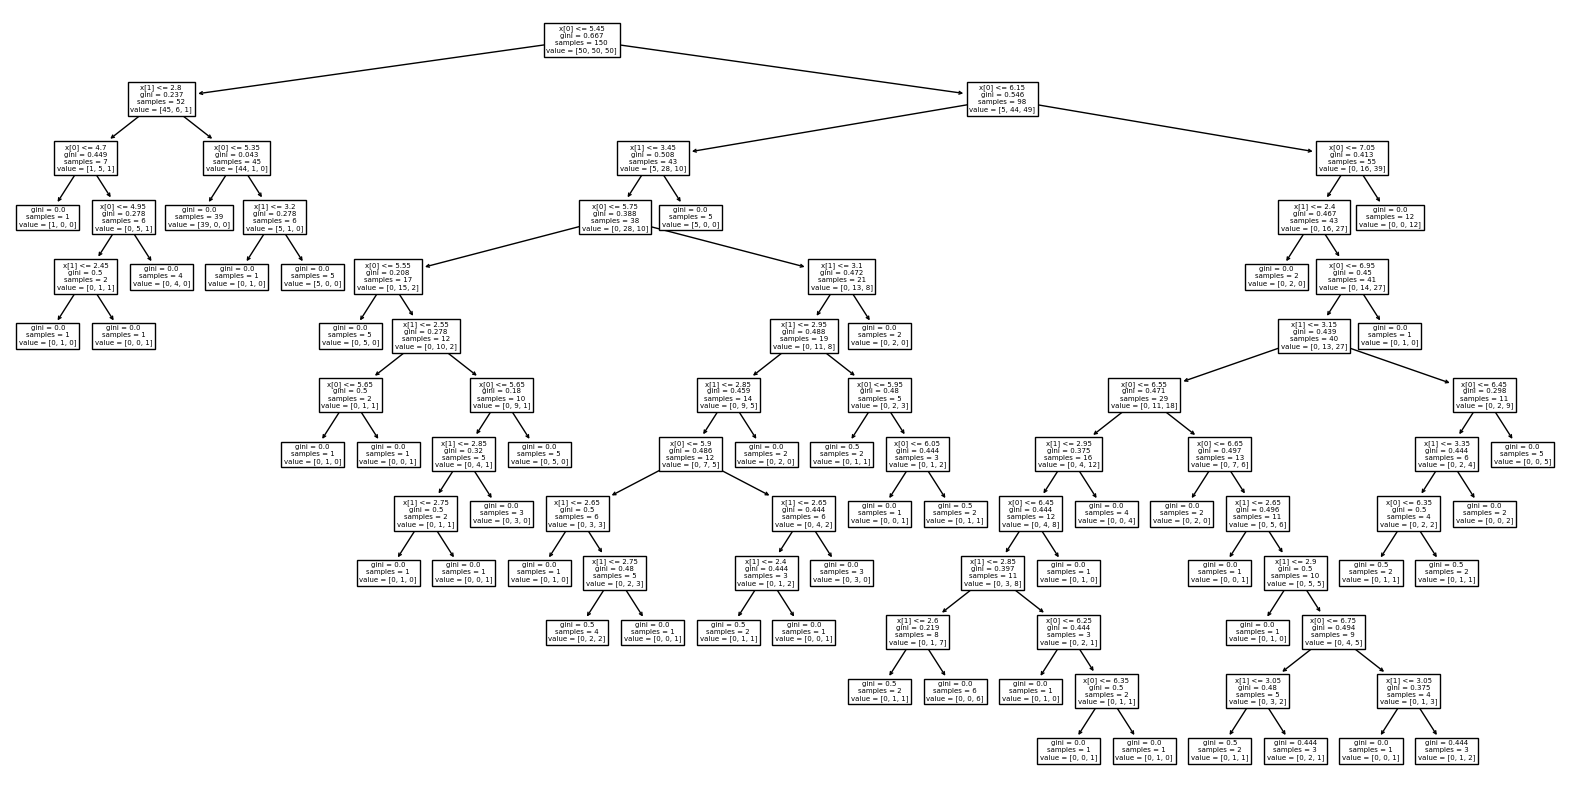

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf)
plt.show()

In [ ]:
# observation with all the independent features

X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [ ]:
clf.fit(X,y)

DecisionTreeClassifier(random_state=0)

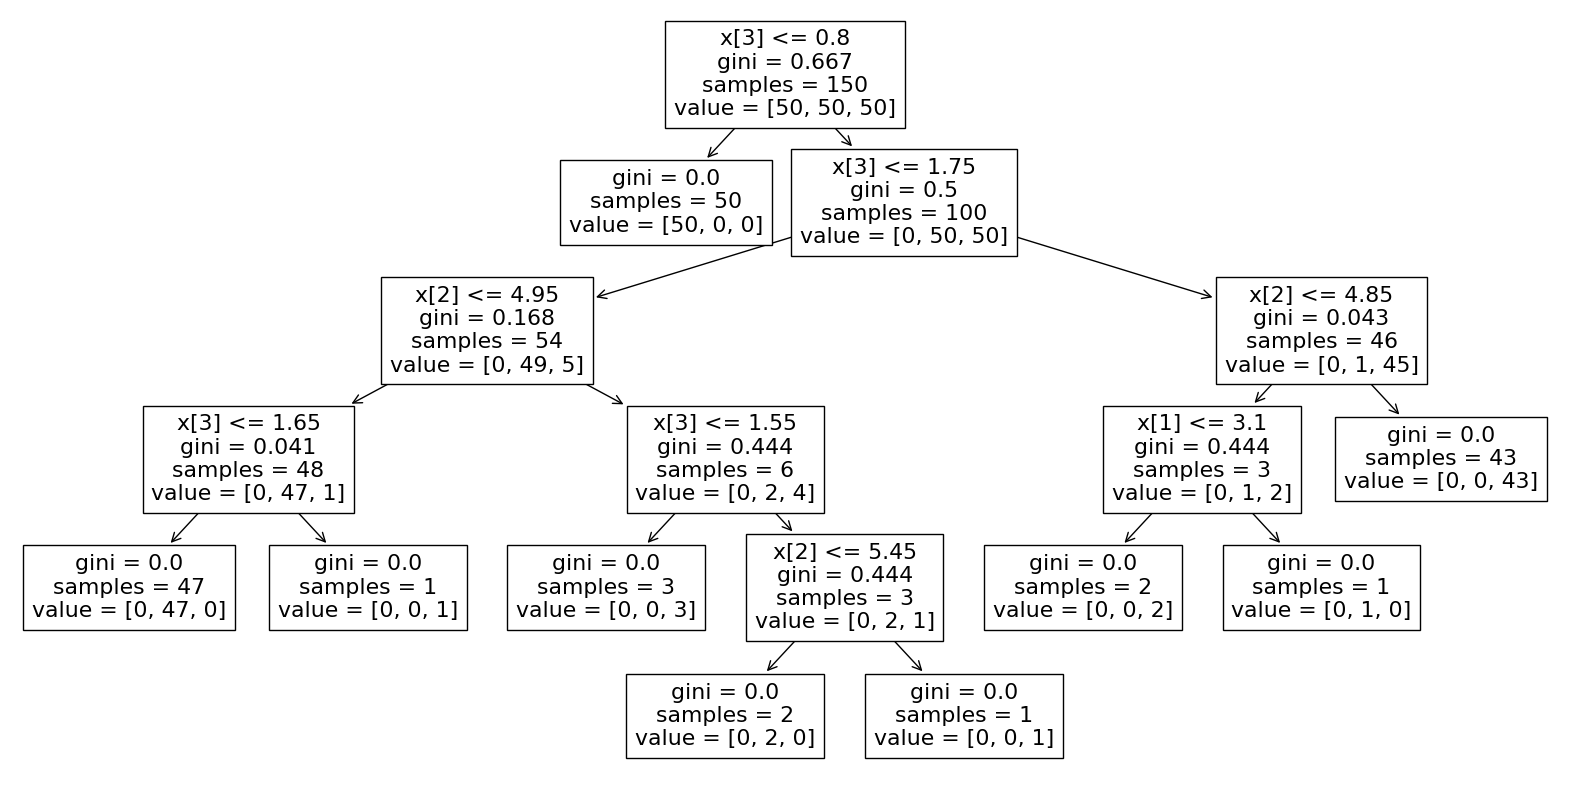

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf)
plt.show()

In [ ]:
# observation with all first and third independent features

X = df.iloc[:,[1,3]]
y = df.iloc[:,-1]

In [ ]:
clf.fit(X,y)

DecisionTreeClassifier(random_state=0)

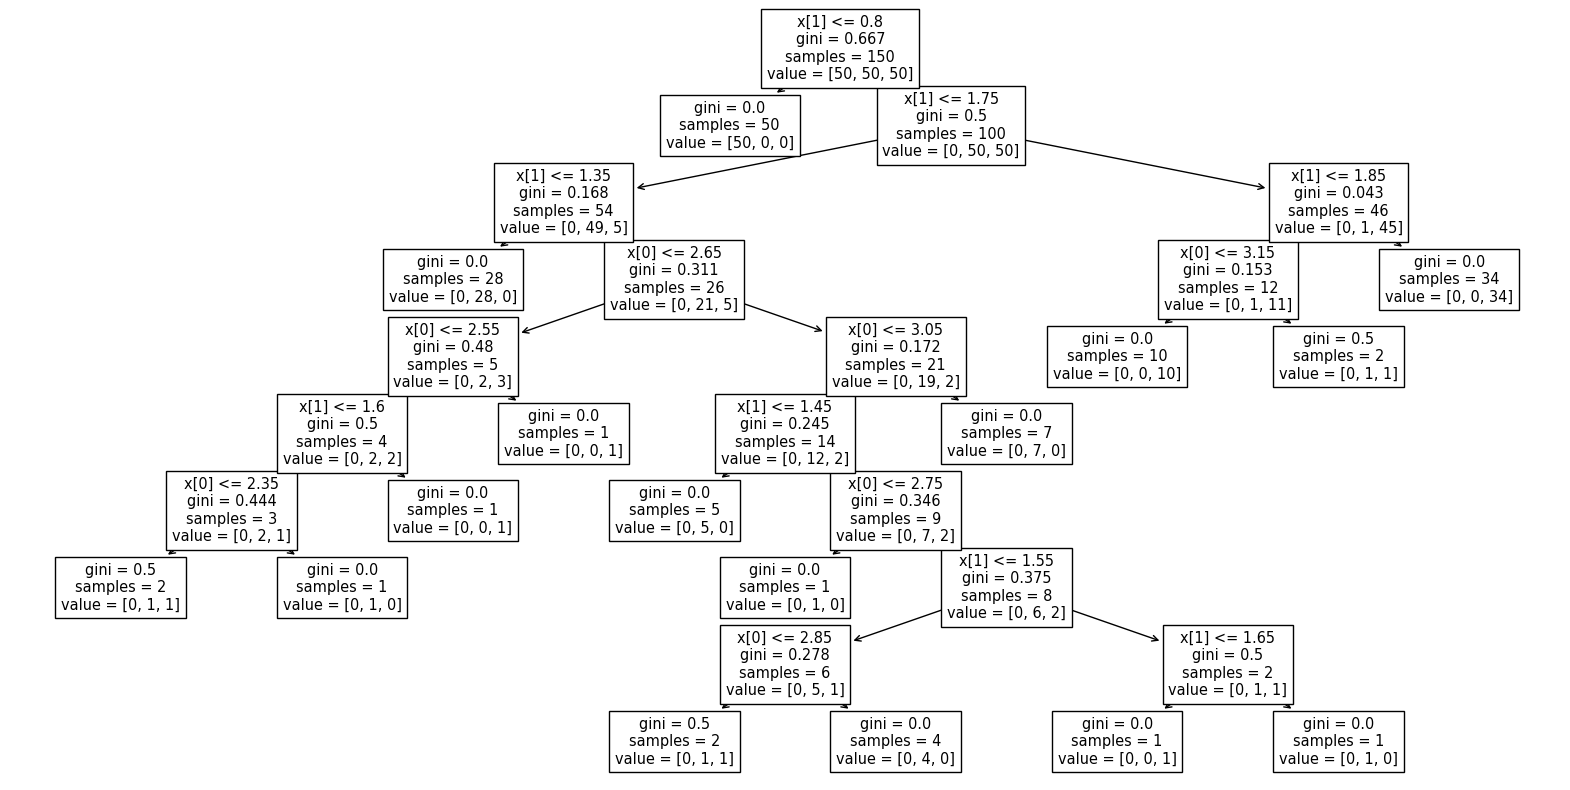

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf)
plt.show()

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
X = df.iloc[:,[2,7,8,9,10,12,14]]
y = df.iloc[:,-2]

In [ ]:
X.head()

,sex,embarked,class,who,adult_male,embark_town,alone
0,male,S,Third,man,True,Southampton,False
1,female,C,First,woman,False,Cherbourg,False
2,female,S,Third,woman,False,Southampton,True
3,female,S,First,woman,False,Southampton,False
4,male,S,Third,man,True,Southampton,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

for column in X.columns:
  X[column] = le.fit_transform(X[column])

In [ ]:
X.head()

,sex,embarked,class,who,adult_male,embark_town,alone
0,1,2,2,1,1,2,0
1,0,0,0,2,0,0,0
2,0,2,2,2,0,2,1
3,0,2,0,2,0,2,0
4,1,2,2,1,1,2,1


In [ ]:
y.replace({'no':0,'yes':1},inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=4)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy')

In [ ]:
print(score)

[0.79850746 0.84328358 0.81343284 0.78947368 0.83458647]


In [ ]:
score_pred = cross_val_score(clf,X_test,y_pred,cv=5,scoring='accuracy')

In [ ]:
print(score_pred)

[1.         1.         0.97777778 1.         1.        ]


In [ ]:
score_test = cross_val_score(clf,X_test,y_test,cv=5,scoring='accuracy')
print(score_test)

[0.82222222 0.8        0.77777778 0.75       0.72727273]


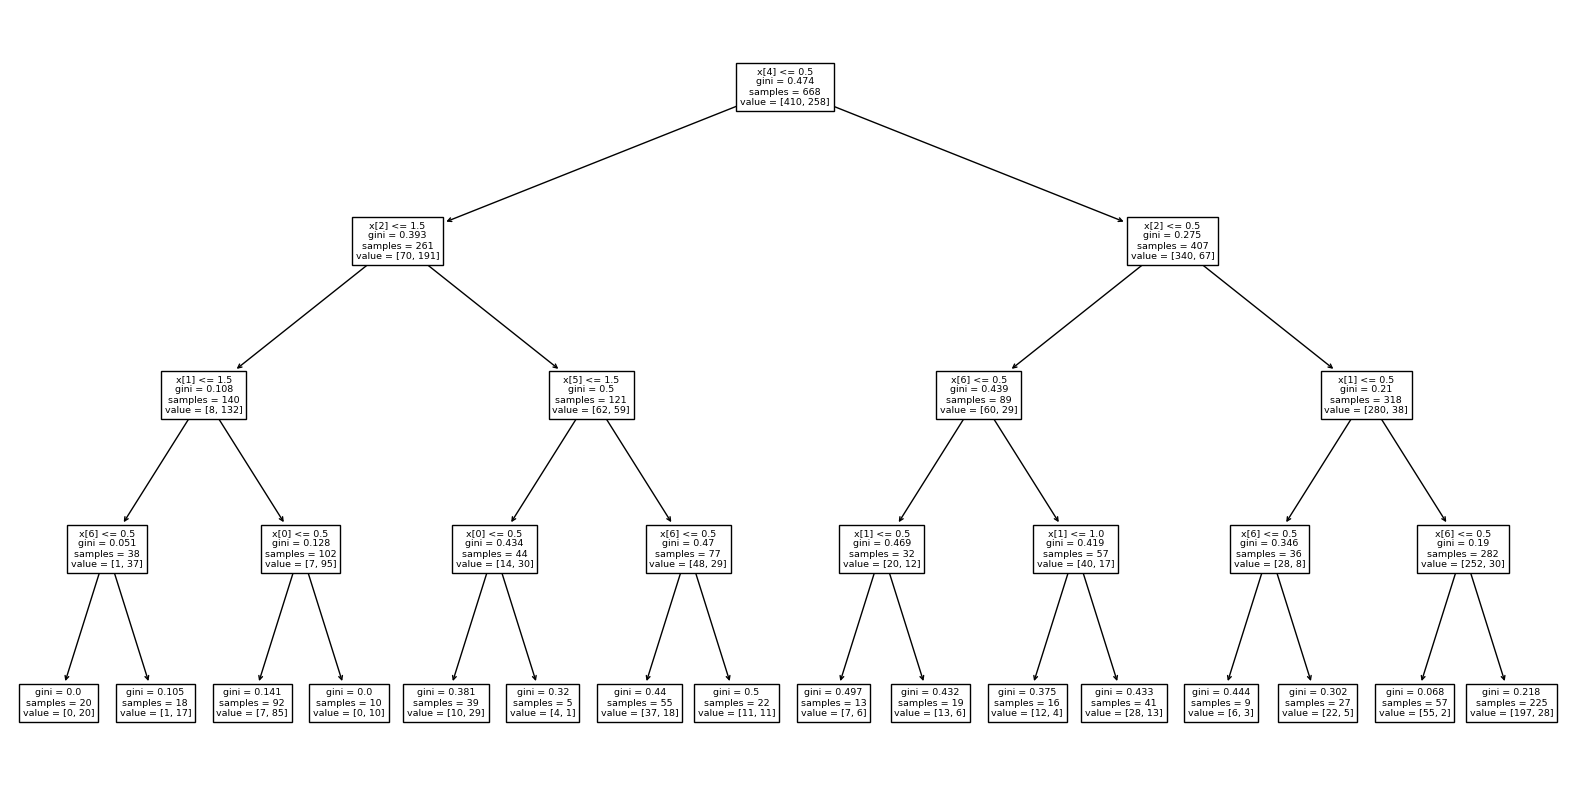

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf)
plt.show()